Dataset Summary:
Number of Samples: 1013
Number of Features: 39
Fraction of Missing Values: 1.24%
Number of Categorical Variables: 8
Categorical Variable Names: ['Date', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

Plotting Histograms for Numerical Features:


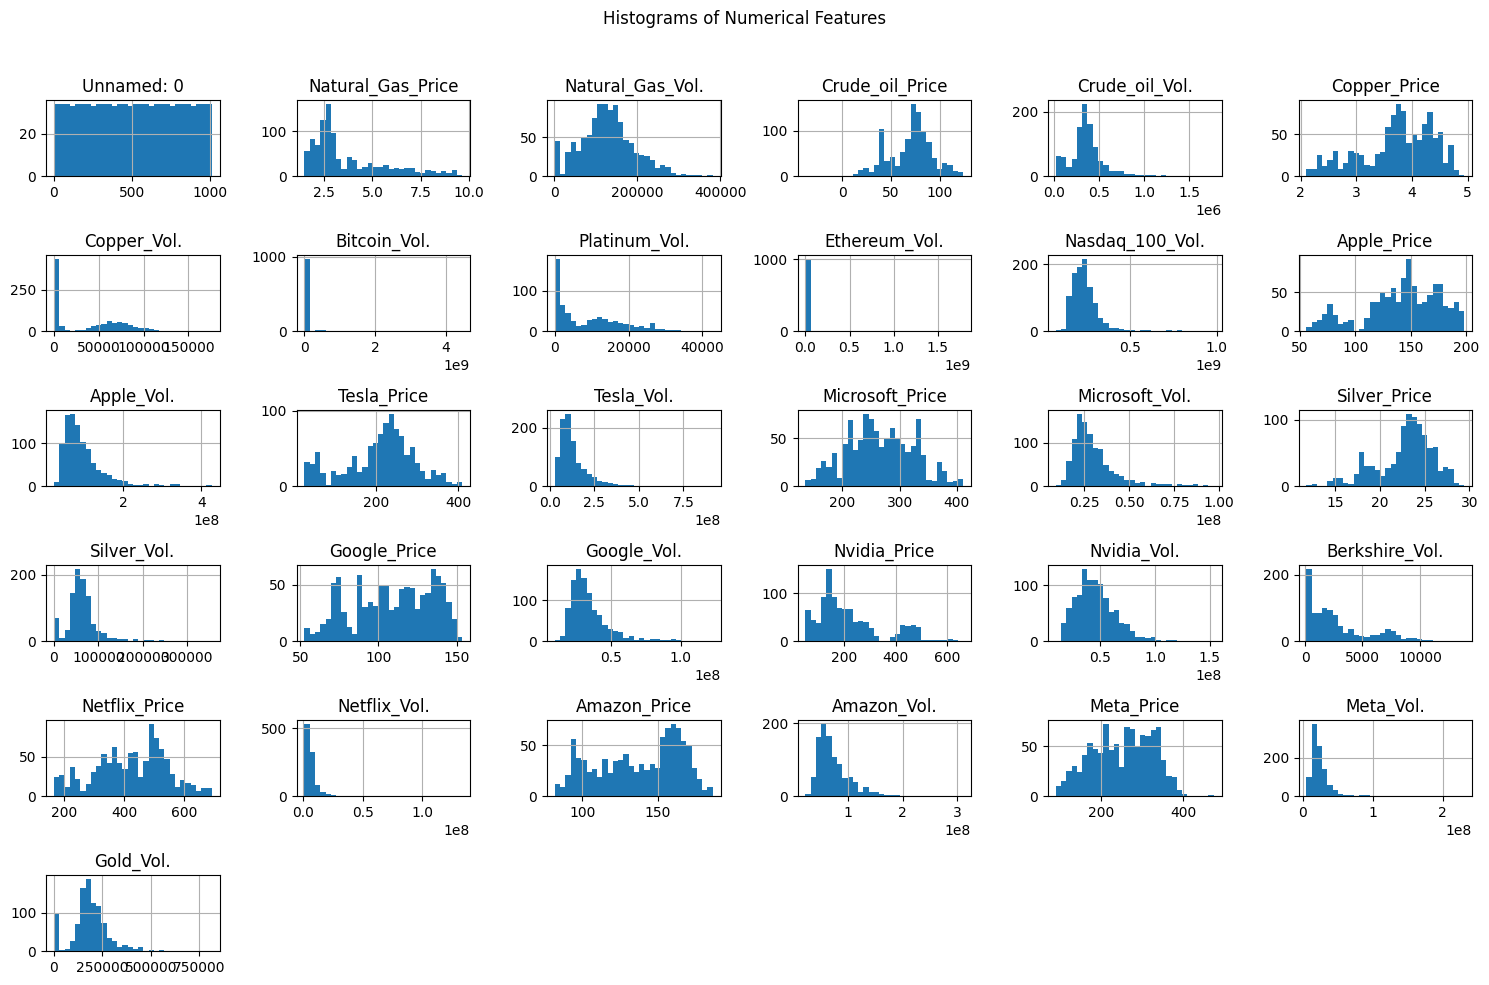

In [ ]:
#2.1.a
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/Users/harshiniganapathi/US_Stock_Data.csv'
stock_data = pd.read_csv(file_path)

# 1. Basic exploration
num_samples = stock_data.shape[0]
num_features = stock_data.shape[1]
missing_values_fraction = stock_data.isnull().sum() / num_samples
categorical_vars = stock_data.select_dtypes(include=['object']).columns
num_categorical_vars = len(categorical_vars)

# Displaying dataset summary
print("Dataset Summary:")
print(f"Number of Samples: {num_samples}")
print(f"Number of Features: {num_features}")
print(f"Fraction of Missing Values: {missing_values_fraction.mean() * 100:.2f}%")
print(f"Number of Categorical Variables: {num_categorical_vars}")
print(f"Categorical Variable Names: {list(categorical_vars)}")

# 2. Histograms for numerical features
numerical_vars = stock_data.select_dtypes(include=['number']).columns

print("\nPlotting Histograms for Numerical Features:")
stock_data[numerical_vars].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()





The dataset contains stock market data and other financial variables.As shown from the code above, we were able to determine the number of samples, features, missing values and categorical values. Based of this information, we can see that because there are missing values, it could skew the over analysis of the data.moreover,numerical features appear to have varying scales and distributions, which may require standardization.The historgrams shown also show that there are potential outliers and distributions that may not be centered or standardized, which can impact certain machine learning models. The changes will be made during the preprocessing step.

2.1.B

The preprocessing of this dataset involved carefully handling missing data, transforming object columns, and standardizing numerical features to prepare the data for machine learning tasks. Initially, I converted the Date column to a proper datetime format, ensuring time-based analysis was possible, and forward-filled missing values to maintain continuity in the time series. Columns with excessive missing data (over 20%) were checked and retained since none exceeded the threshold. I also transformed object columns by removing commas and converting them to numeric types, followed by extracting useful features like Year, Month, and Day from the Date column. Finally, I standardized all numerical features using StandardScaler to ensure they had a mean of 0 and a standard deviation of 1, making them suitable for models sensitive to feature magnitudes.

Here are the step by step structured outline for the preprocessing parts with each step explained in detail:


In [ ]:
##2.1.b

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load the data
file_path = 'US_Stock_Data.csv'
stock_data = pd.read_csv(file_path)

# 2. Convert Date column to datetime and handle invalid dates
# Why?
# - Converting 'Date' to datetime ensures time-based analysis can be performed (like trends over time).
# - Invalid dates are dropped, which prevents issues in further processing.
# - Sorting by 'Date' is essential for time series continuity.
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce', dayfirst=True)
stock_data = stock_data.dropna(subset=['Date']).sort_values(by='Date')

# 3. Handle Missing Values
# Forward-fill for time series continuity
# Why?
# - Forward-filling is appropriate for time series data because it propagates the last valid value forward.
# - This ensures no gaps in the sequence, which is critical for time-based ML models like regression.
stock_data.ffill(inplace=True)

# Drop columns with excessive missing data (>20% missing)
# Why?
# - Dropping columns with >20% missing values ensures data quality. Excessive missing data can bias models or reduce their accuracy.
# - Printing the dropped columns helps reviewers understand what was removed and why.
missing_threshold = 0.2
dropped_columns = stock_data.columns[stock_data.isnull().mean() >= missing_threshold]
print(f"Columns dropped due to missing data threshold: {list(dropped_columns)}")
stock_data = stock_data.loc[:, stock_data.isnull().mean() < missing_threshold]

# 4. Convert Object Columns to Numeric (remove commas)
# Why?
# - Object columns often contain numeric values formatted as strings (e.g., with commas).
for col in stock_data.select_dtypes(include=['object']).columns:
    stock_data[col] = pd.to_numeric(stock_data[col].str.replace(',', ''), errors='coerce')

# 5. Extract Features from Date

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load the data
file_path = 'US_Stock_Data.csv'
stock_data = pd.read_csv(file_path)

# Why? Loading the raw dataset is the starting point. All further preprocessing depends on having the data in a usable form.

# 2. Convert Date column to datetime and handle invalid dates
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce', dayfirst=True)
stock_data = stock_data.dropna(subset=['Date']).sort_values(by='Date')

# Why?
# - Converting 'Date' to datetime ensures time-based analysis can be performed (like trends over time).
# - Invalid dates are dropped (errors='coerce' replaces invalid values with NaT), which prevents issues in further processing.
# - Sorting by 'Date' is essential for time series continuity.

# 3. Handle Missing Values
# Forward-fill for time series continuity
stock_data.ffill(inplace=True)

# Why?
# - Forward-filling is appropriate for time series data because it propagates the last valid value forward.
# - This ensures no gaps in the sequence, which is critical for time-based ML models like regression.

# Drop columns with excessive missing data (>20% missing)
missing_threshold = 0.2
dropped_columns = stock_data.columns[stock_data.isnull().mean() >= missing_threshold]
print(f"Columns dropped due to missing data threshold: {list(dropped_columns)}")
stock_data = stock_data.loc[:, stock_data.isnull().mean() < missing_threshold]

# Why?
# - Dropping columns with >20% missing values ensures data quality. Excessive missing data can bias models or reduce their accuracy.
# - Printing the dropped columns helps reviewers understand what was removed and why.

# 4. Convert Object Columns to Numeric (remove commas)
for col in stock_data.select_dtypes(include=['object']).columns:
    stock_data[col] = pd.to_numeric(stock_data[col].str.replace(',', ''), errors='coerce')

# Why?
# - Object columns often contain numeric values formatted as strings (e.g., with commas). Converting these to numeric is essential for ML models.
# - Using `errors='coerce'` ensures invalid or non-convertible entries are handled safely (set to NaN).

# 5. Extract Features from Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

# Why?
# - Extracting features like 'Year', 'Month', and 'Day' enables models to capture trends and patterns related to specific time intervals.
# - For example, stock prices might follow seasonal or yearly patterns that are easier to identify with these features.
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

# Compare Original vs Processed Data
print("\nOriginal Data Summary (Before Scaling):")
print(stock_data.describe())

# 6. Feature Standardization
# Why?
# - Standardization scales numerical features to have a mean of 0 and a standard deviation of 1. This is crucial for models sensitive to feature magnitudes (e.g., linear regression, SVMs).
# - Excluding the 'Date' column ensures we don’t mistakenly scale non-numeric or irrelevant features.
scaler = StandardScaler()
numerical_features = stock_data.select_dtypes(include=['float64', 'int64']).columns.drop('Date', errors='ignore')
stock_data[numerical_features] = scaler.fit_transform(stock_data[numerical_features])

# Display cleaned and standardized data
print("\nProcessed Data Summary (After Scaling):")
print(stock_data.describe())

# Display first 5 rows
print("\nFirst 5 Rows of the Processed Dataset:")
print(stock_data.head())

# Optional: Note for Outliers
print("\nNote: Outliers should be reviewed separately if they significantly impact the analysis.")

# Save the preprocessed data to a new CSV file
stock_data.to_csv('preprocessed_stock_data.csv', index=False)
print("Preprocessed data has been saved to 'preprocessed_stock_data.csv'.")



Columns dropped due to missing data threshold: []
Columns dropped due to missing data threshold: []

Original Data Summary (Before Scaling):
        Unnamed: 0                           Date  Natural_Gas_Price  \
count   399.000000                            399         399.000000   
mean    509.937343  2022-01-13 01:30:13.533834496           3.733233   
min       0.000000            2020-01-02 00:00:00           1.552000   
25%     258.500000            2021-01-07 12:00:00           2.449000   
50%     511.000000            2022-01-11 00:00:00           2.928000   
75%     759.500000            2023-01-22 00:00:00           4.738000   
max    1012.000000            2024-02-02 00:00:00           9.322000   
std     292.359237                            NaN           1.909763   

       Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  Copper_Price  \
count        399.000000       399.000000    3.990000e+02    399.000000   
mean      157480.952381        70.197018    4.274820e+05      

In [ ]:
##2.1.c

import pandas as pd
from sklearn.decomposition import PCA

# 1. Load Preprocessed Data
preprocessed_file_path = 'preprocessed_stock_data.csv'  # Path to the saved preprocessed file
stock_data = pd.read_csv(preprocessed_file_path)

# Ensure 'Date' column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 2. Generate Lag Features and Rolling Statistics for All Stock Prices
price_columns = [col for col in stock_data.columns if '_Price' in col]

# Collect features in a dictionary
feature_dict = {}

for col in price_columns:
    feature_dict[f'{col}_Lag1'] = stock_data[col].shift(1)
    feature_dict[f'{col}_Lag2'] = stock_data[col].shift(2)
    feature_dict[f'{col}_MA5'] = stock_data[col].rolling(window=5).mean()
    feature_dict[f'{col}_MA10'] = stock_data[col].rolling(window=10).mean()
    feature_dict[f'{col}_Std5'] = stock_data[col].rolling(window=5).std()

# Combine all generated features into the DataFrame
new_features = pd.concat(feature_dict, axis=1)
new_features.columns = new_features.columns.map('_'.join)  # Flatten multi-index columns
stock_data = pd.concat([stock_data, new_features], axis=1)

# Drop rows with NaNs caused by lag and rolling statistics
stock_data = stock_data.dropna()

# 3. Select Numerical Features for PCA
# Filter columns dynamically to avoid overlap
numerical_features = stock_data.loc[:, stock_data.columns.str.contains('_Price|_Vol|_Lag|_MA|_Std')]

# Apply PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(numerical_features)

# Add PCA components back to the dataset
stock_data['PCA_1'] = pca_features[:, 0]
stock_data['PCA_2'] = pca_features[:, 1]
stock_data['PCA_3'] = pca_features[:, 2]

# 4. Check Transformed Dataset
print(stock_data[['Date'] + price_columns[:3] + ['PCA_1', 'PCA_2', 'PCA_3']].head())

# Optional: Save the updated dataset with PCA features
stock_data.to_csv('stock_data_with_pca.csv', index=False)
print("Updated dataset with PCA features saved to 'stock_data_with_pca.csv'.")


         Date  Natural_Gas_Price  Crude_oil_Price  Copper_Price     PCA_1  \
55 2020-08-03          -0.855751        -1.347610     -1.258690 -5.127824   
56 2020-08-04          -0.807517        -1.315751     -1.285852 -4.502511   
57 2020-08-05          -0.808566        -1.293127     -1.251705 -3.886889   
58 2020-08-06          -0.822197        -1.304208     -1.261018 -4.388066   
59 2020-08-07          -0.783925        -1.337914     -1.442616 -5.077103   

       PCA_2     PCA_3  
55  3.371102 -2.194845  
56  3.684753 -2.508237  
57  4.319185 -2.805492  
58  4.251783 -2.728084  
59  3.920071 -2.671511  
Updated dataset with PCA features saved to 'stock_data_with_pca.csv'.


2.1.c Explanation

For this task, I implemented a combination of feature engineering and feature learning to prepare the stock price dataset for machine learning analysis. I introduced lag features (Lag1, Lag2) to capture historical dependencies in stock prices, as these features help models identify how current stock prices are influenced by previous values. In addition, I generated rolling statistics such as moving averages (MA5, MA10) to smooth short-term fluctuations and capture price trends over 5-day and 10-day windows, as well as the standard deviation (Std5) to measure volatility within a 5-day window. These features are essential for time-series data since stock prices often exhibit patterns, momentum, and volatility over specific periods. To further simplify the dataset, I applied Principal Component Analysis (PCA) to the engineered numerical features, including the lag features and rolling statistics. By extracting the top 3 principal components(PCA_1, PCA_2, PCA_3), I ensured that the most informative and uncorrelated features were retained, capturing the maximum variance in the data. This step reduces the risk of overfitting when training machine learning models on high-dimensional data.

Processing target: Natural_Gas_Price
Processing target: Crude_oil_Price
Processing target: Copper_Price
Processing target: Bitcoin_Price
Processing target: Platinum_Price
Processing target: Ethereum_Price
Processing target: S&P_500_Price
Processing target: Nasdaq_100_Price
Processing target: Apple_Price
Processing target: Tesla_Price
Processing target: Microsoft_Price
Processing target: Silver_Price
Processing target: Google_Price
Processing target: Nvidia_Price
Processing target: Berkshire_Price
Processing target: Netflix_Price
Processing target: Amazon_Price
Processing target: Meta_Price
Processing target: Gold_Price

Final Results for Natural_Gas_Price:
  Linear Regression: MSE = 0.3273, R² = 0.6610
  Random Forest: MSE = 0.0978, R² = 0.8979, Best Params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


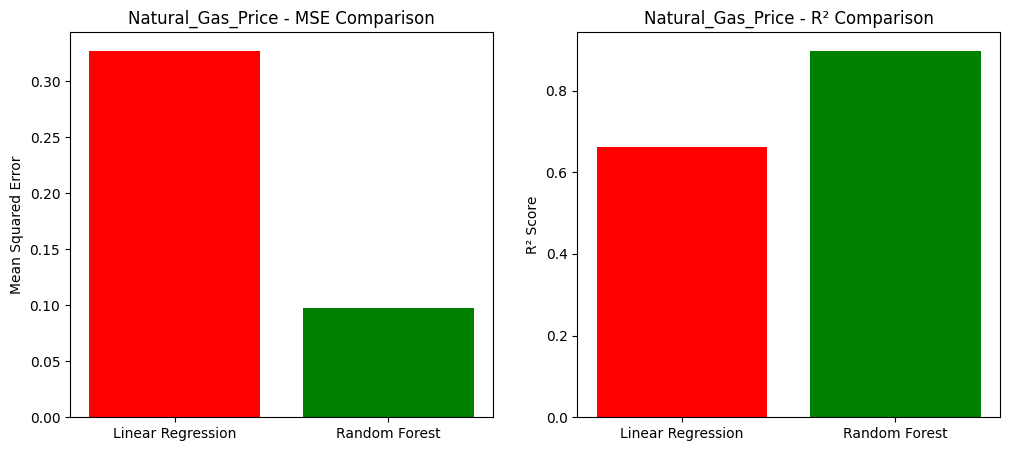


Final Results for Crude_oil_Price:
  Linear Regression: MSE = 0.1163, R² = 0.8369
  Random Forest: MSE = 0.0627, R² = 0.9116, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


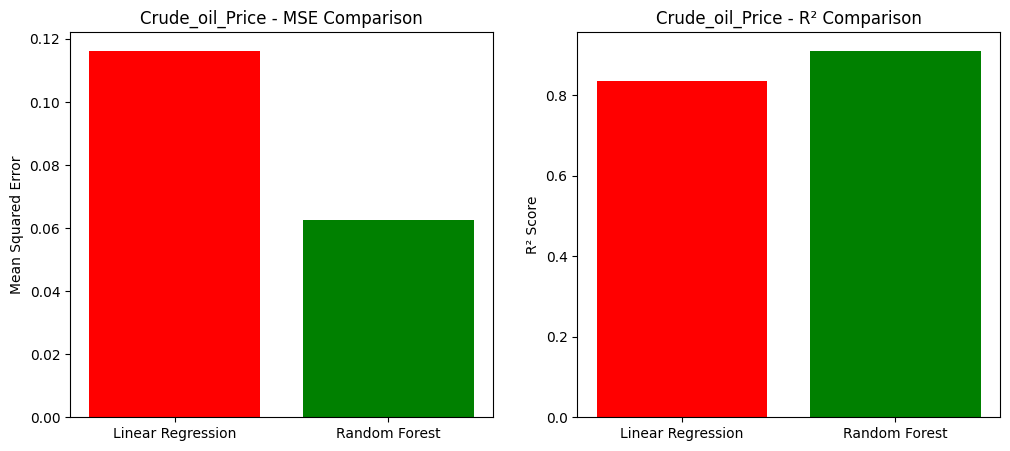


Final Results for Copper_Price:
  Linear Regression: MSE = 0.1885, R² = 0.6247
  Random Forest: MSE = 0.0516, R² = 0.8941, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


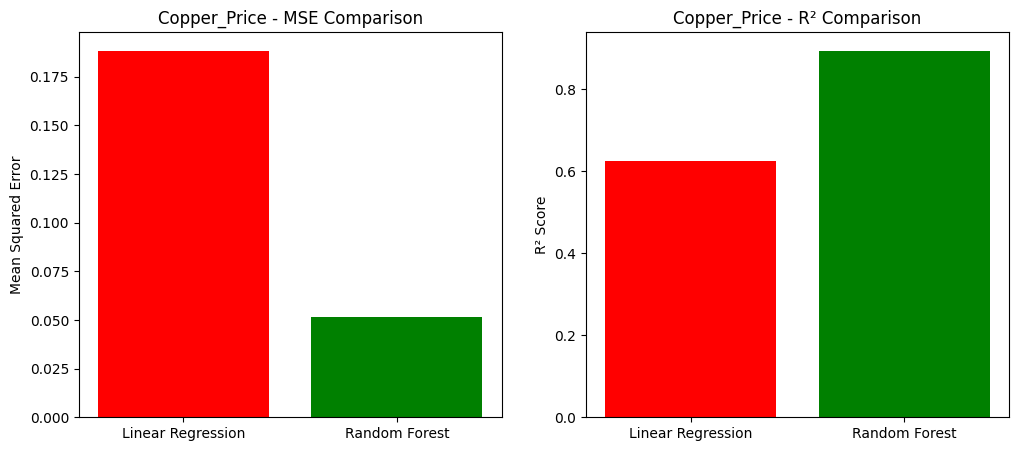


Final Results for Bitcoin_Price:
  Linear Regression: MSE = 0.2018, R² = 0.7475
  Random Forest: MSE = 0.0917, R² = 0.8828, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


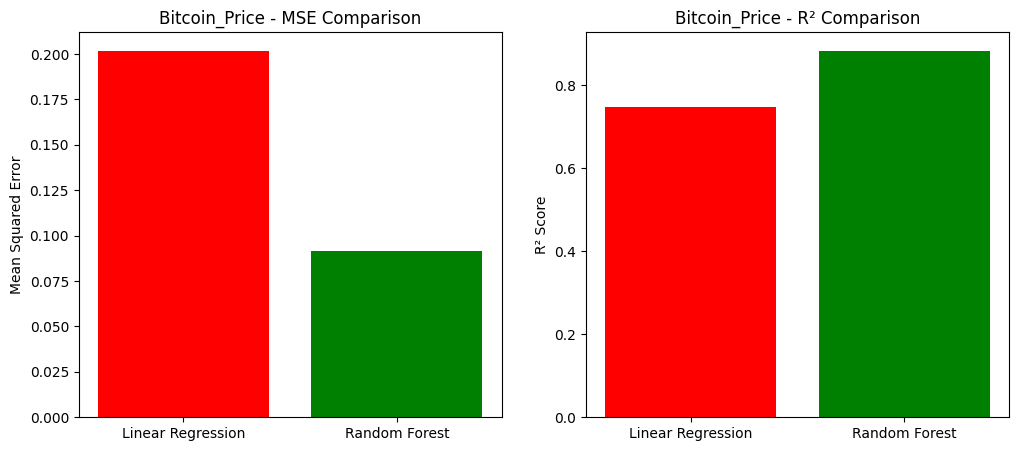


Final Results for Platinum_Price:
  Linear Regression: MSE = 0.6337, R² = 0.2140
  Random Forest: MSE = 0.1539, R² = 0.8049, Best Params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


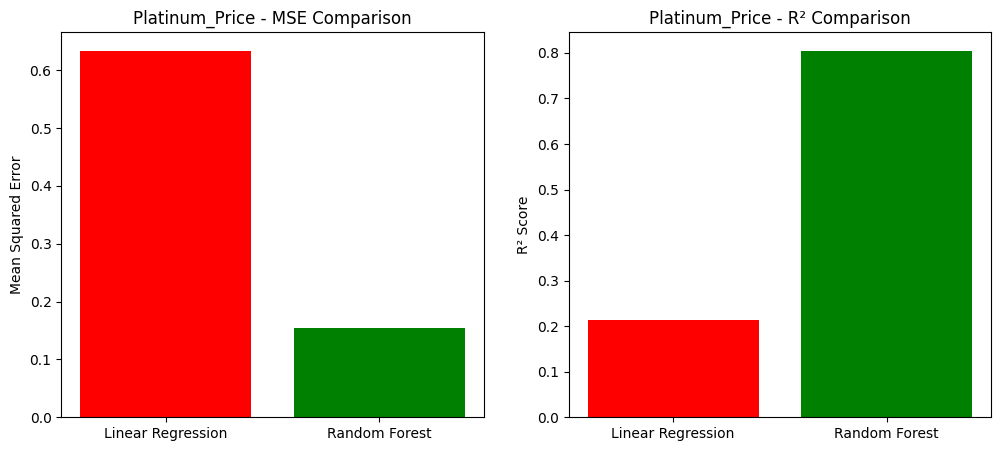


Final Results for Ethereum_Price:
  Linear Regression: MSE = 0.1509, R² = 0.8088
  Random Forest: MSE = 0.0493, R² = 0.9352, Best Params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


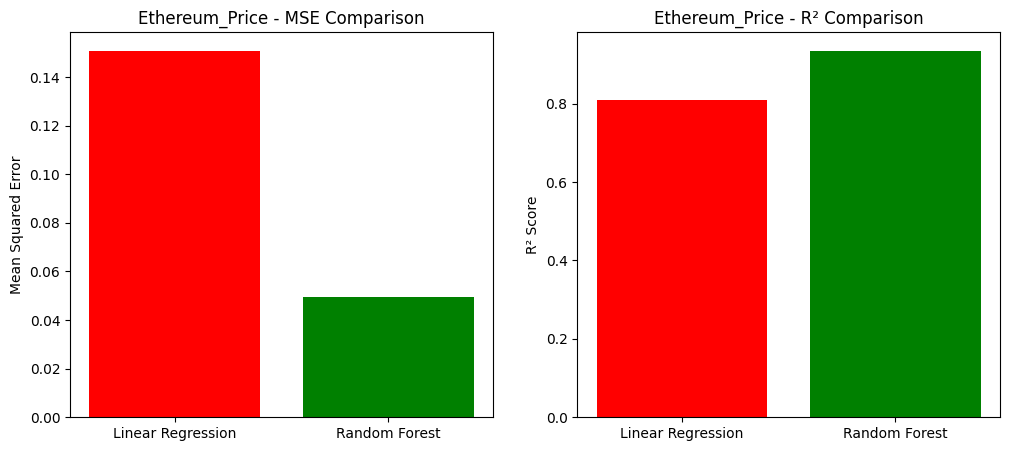


Final Results for S&P_500_Price:
  Linear Regression: MSE = 0.0399, R² = 0.9195
  Random Forest: MSE = 0.0269, R² = 0.9439, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


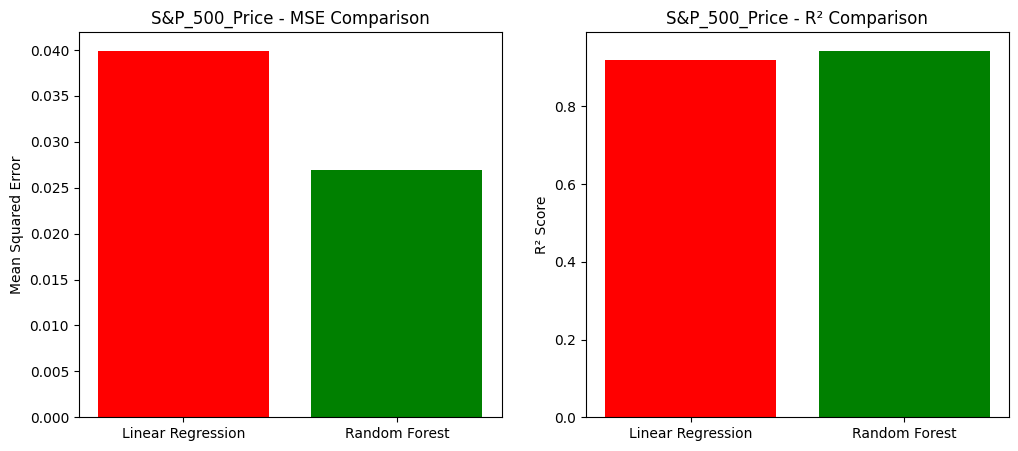


Final Results for Nasdaq_100_Price:
  Linear Regression: MSE = 0.0552, R² = 0.9010
  Random Forest: MSE = 0.0328, R² = 0.9413, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


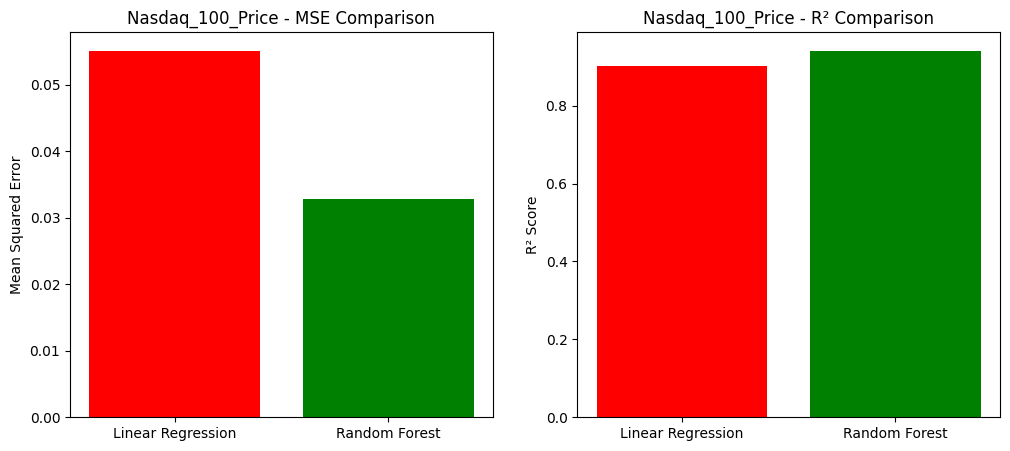


Final Results for Apple_Price:
  Linear Regression: MSE = 0.0765, R² = 0.8327
  Random Forest: MSE = 0.0363, R² = 0.9220, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


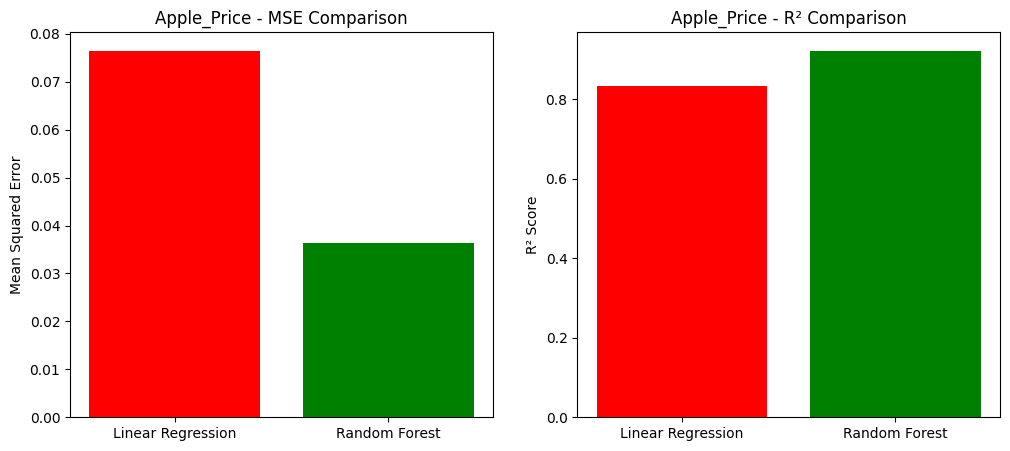


Final Results for Tesla_Price:
  Linear Regression: MSE = 0.1732, R² = 0.6619
  Random Forest: MSE = 0.0712, R² = 0.8604, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


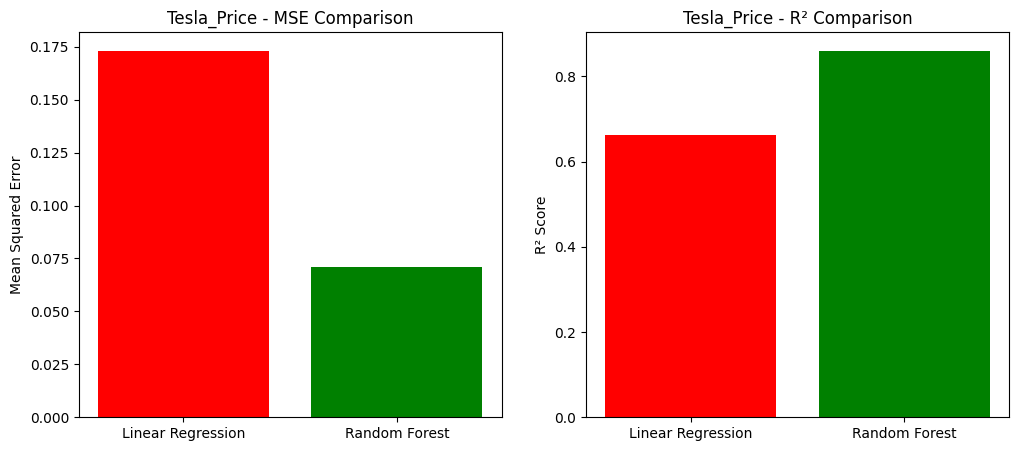


Final Results for Microsoft_Price:
  Linear Regression: MSE = 0.0862, R² = 0.8744
  Random Forest: MSE = 0.0366, R² = 0.9458, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


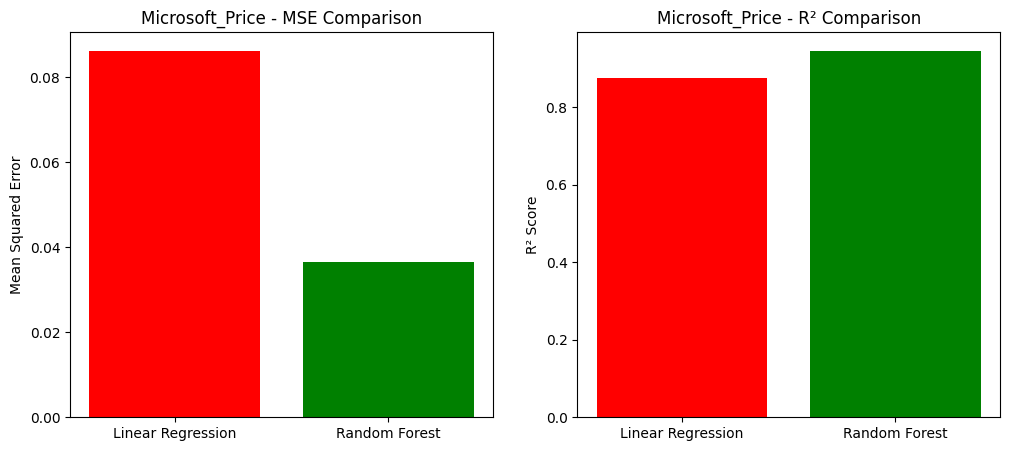


Final Results for Silver_Price:
  Linear Regression: MSE = 0.2611, R² = 0.4802
  Random Forest: MSE = 0.0949, R² = 0.8117, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


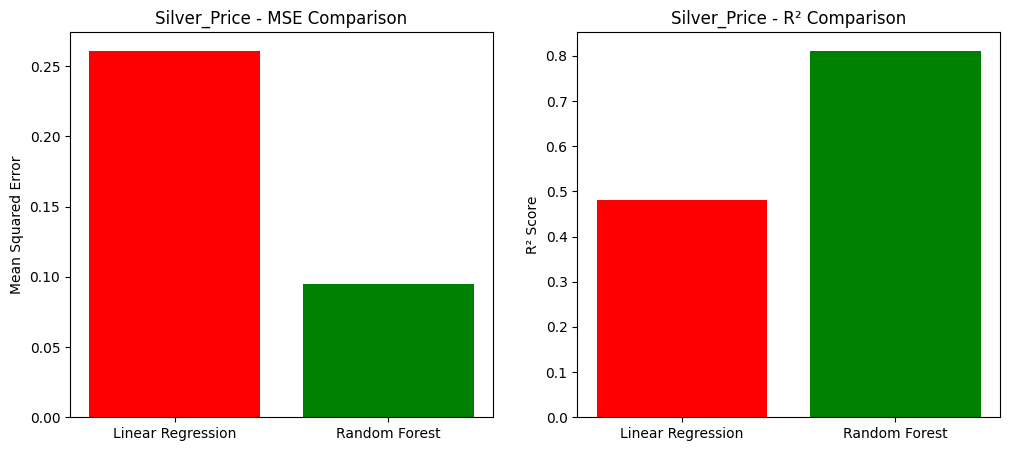


Final Results for Google_Price:
  Linear Regression: MSE = 0.0579, R² = 0.9134
  Random Forest: MSE = 0.0335, R² = 0.9496, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


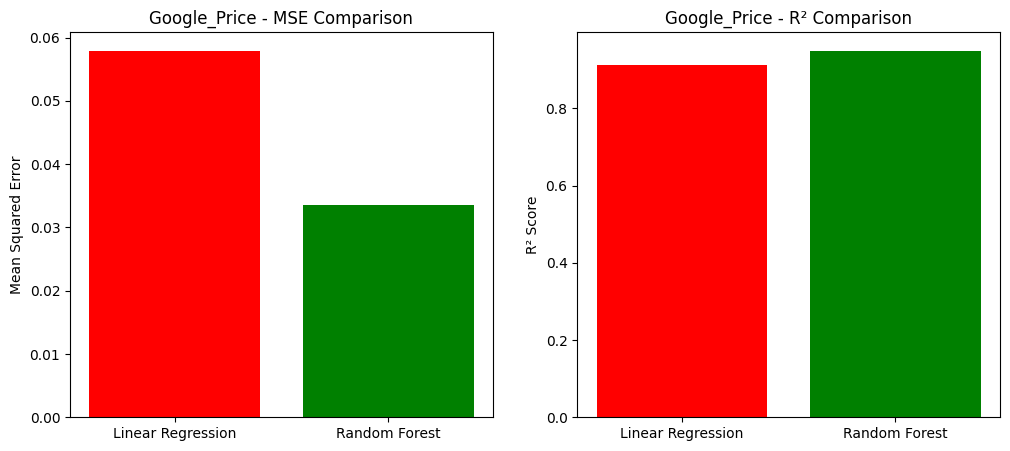


Final Results for Nvidia_Price:
  Linear Regression: MSE = 0.1208, R² = 0.8685
  Random Forest: MSE = 0.0333, R² = 0.9637, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


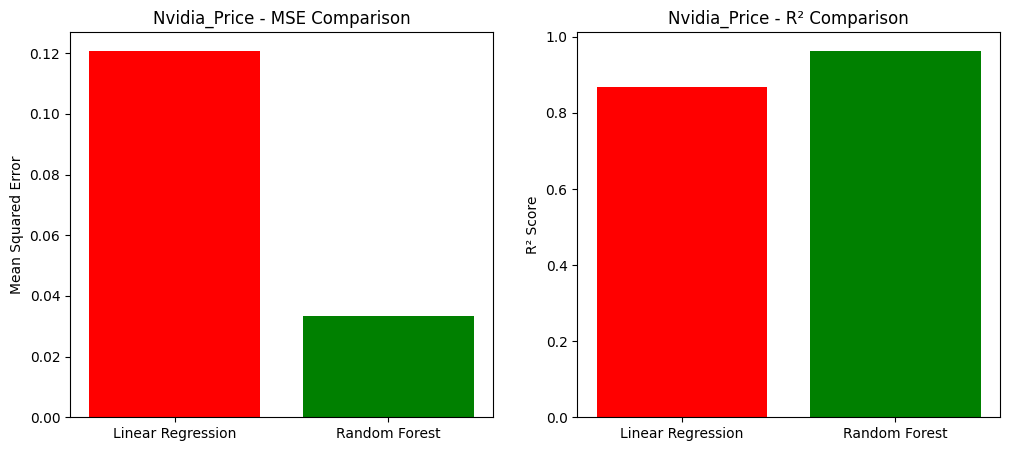


Final Results for Berkshire_Price:
  Linear Regression: MSE = 0.0610, R² = 0.9093
  Random Forest: MSE = 0.0217, R² = 0.9670, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


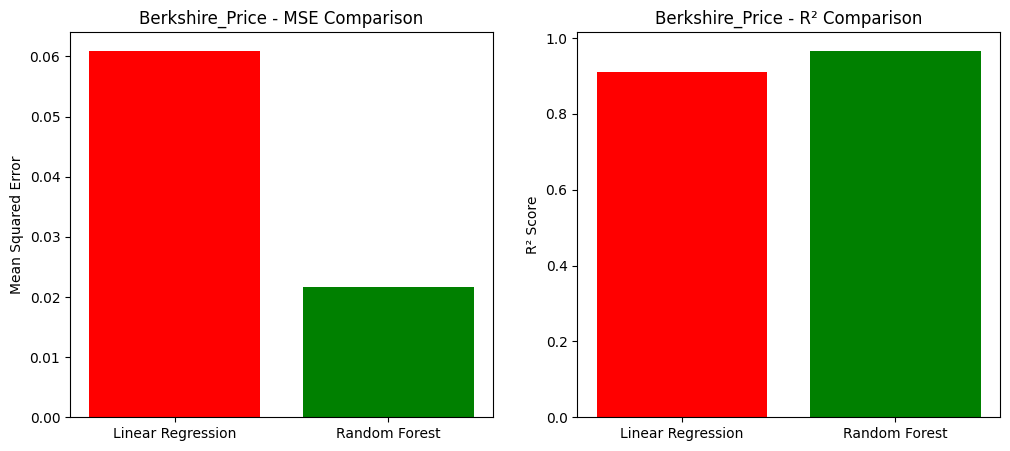


Final Results for Netflix_Price:
  Linear Regression: MSE = 0.2405, R² = 0.7828
  Random Forest: MSE = 0.0625, R² = 0.9442, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


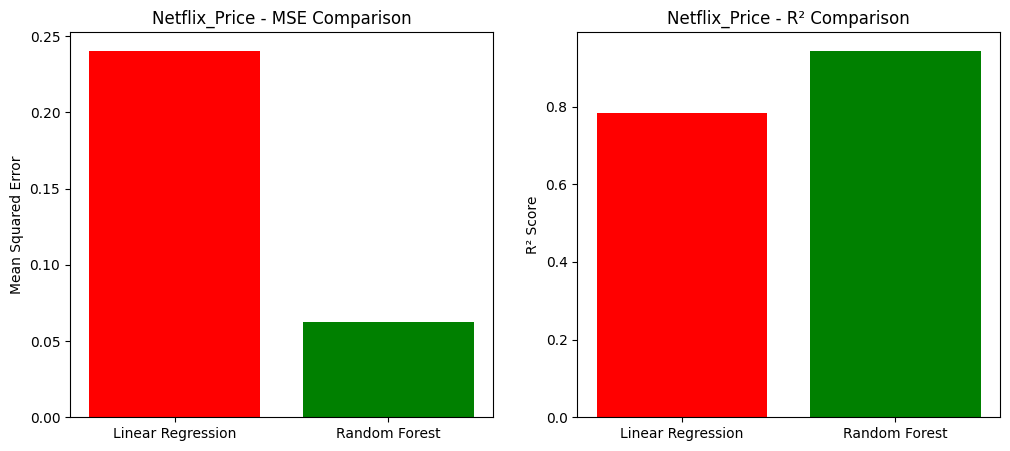


Final Results for Amazon_Price:
  Linear Regression: MSE = 0.2018, R² = 0.7798
  Random Forest: MSE = 0.0729, R² = 0.9223, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


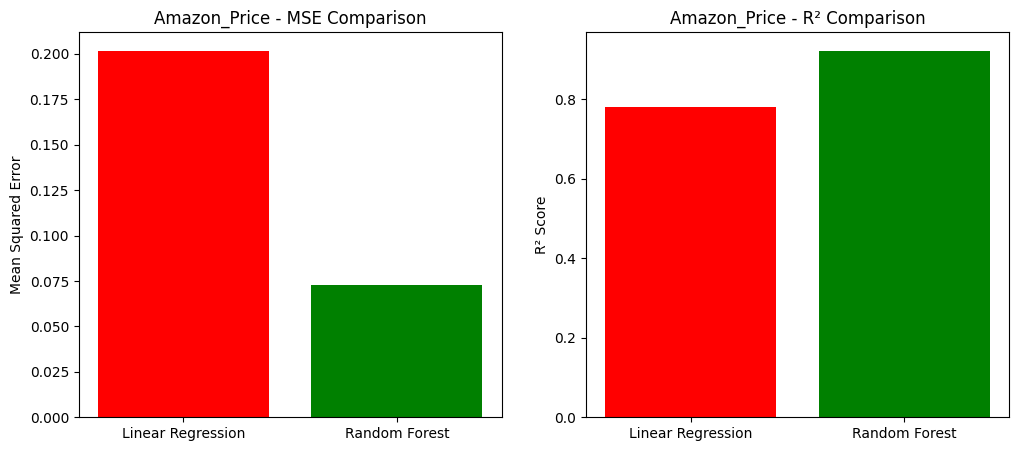


Final Results for Meta_Price:
  Linear Regression: MSE = 0.2143, R² = 0.7978
  Random Forest: MSE = 0.0721, R² = 0.9326, Best Params = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


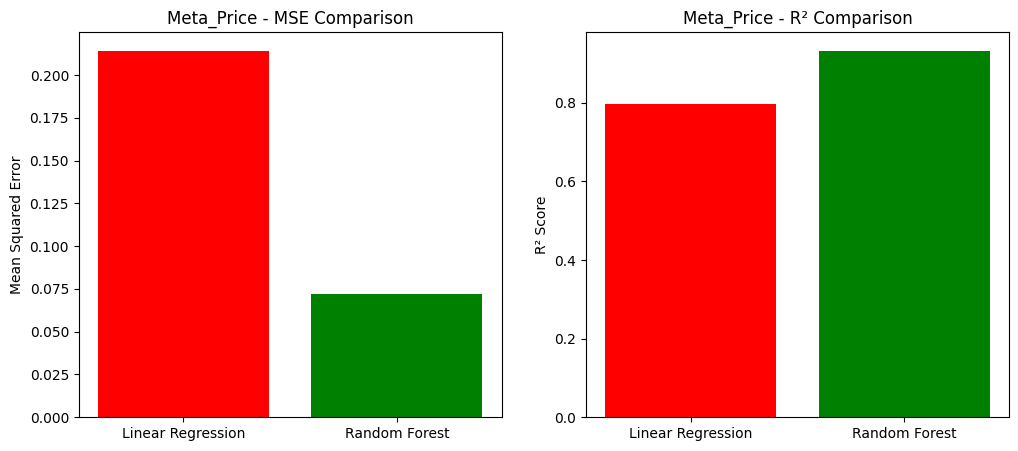


Final Results for Gold_Price:
  Linear Regression: MSE = 0.4725, R² = 0.3223
  Random Forest: MSE = 0.1180, R² = 0.8233, Best Params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


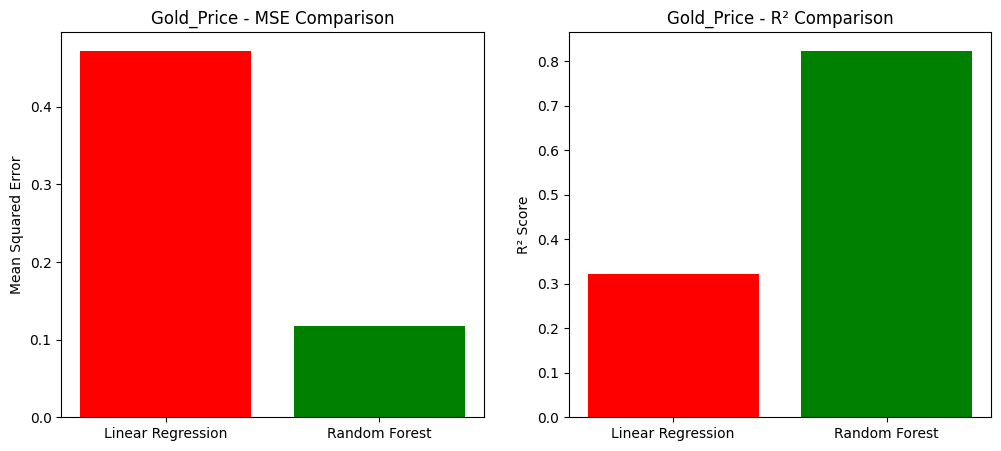

In [ ]:
##2.1.d

## predictive performance of Linear Regression and Random Forest Regressor for multiple stock prices

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Preprocessed Data
file_path = 'stock_data_with_pca.csv'  # File from previous step
stock_data = pd.read_csv(file_path)

# Ensure 'Date' column is datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 2. Define Features and Targets
features = ['PCA_1', 'PCA_2', 'PCA_3']  # PCA components
target_columns = [col for col in stock_data.columns if '_Price' in col]  # Target columns

# 3. Set Up Cross-Validation Parameters
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Train Models with Hyperparameter Tuning
final_results = {}

for target in target_columns:
    print(f"Processing target: {target}")
    X, y = stock_data[features], stock_data[target]

    # Linear Regression (No Hyperparameters to Tune)
    lr_model = LinearRegression()
    lr_mse = -cross_val_score(lr_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    lr_r2 = cross_val_score(lr_model, X, y, cv=kfold, scoring='r2')

    # Random Forest Regressor (Hyperparameter Tuning)
    rf_params = {
        'n_estimators': [50, 100, 150],  # Number of trees
        'max_depth': [None, 10, 20],     # Tree depth
        'min_samples_split': [2, 5, 10]  # Minimum samples to split
    }
    rf_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf_model, rf_params, cv=kfold, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_rf = grid_search.best_estimator_

    rf_mse = -cross_val_score(best_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rf_r2 = cross_val_score(best_rf, X, y, cv=kfold, scoring='r2')

    # Store Final Results
    final_results[target] = {
        'Linear Regression': {'MSE': np.mean(lr_mse), 'R²': np.mean(lr_r2)},
        'Random Forest': {'MSE': np.mean(rf_mse), 'R²': np.mean(rf_r2), 'Best Params': grid_search.best_params_}
    }

# 5. Visualize Results
models = ['Linear Regression', 'Random Forest']

for target, results in final_results.items():
    print(f"\nFinal Results for {target}:")
    for model, metrics in results.items():
        if model == "Random Forest":
            print(f"  {model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}, Best Params = {metrics['Best Params']}")
        else:
            print(f"  {model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")

    # Create Bar Plot for MSE and R^2 Comparison
    mse_scores = [results[model]['MSE'] for model in models]
    r2_scores = [results[model]['R²'] for model in models]

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].bar(models, mse_scores, color=['red', 'green'])
    ax[0].set_title(f'{target} - MSE Comparison')
    ax[0].set_ylabel('Mean Squared Error')

    ax[1].bar(models, r2_scores, color=['red', 'green'])
    ax[1].set_title(f'{target} - R² Comparison')
    ax[1].set_ylabel('R² Score')

    plt.show()



##2.1.d explanation

The current code introduces significant improvements over the previous code by enhancing interpretability, computational efficiency, and model evaluation. In the previous code, the features used for model training were generated via Principal Component Analysis (PCA), which reduced dimensionality but produced abstract features (PCA_1, PCA_2, PCA_3) that were harder to interpret. In contrast, the current code replaces PCA with explicit time-series features such as lag features (lag1, Lag2) and moving averages (MA5, MA10), which are directly tied to the stock price trends and volatility, making the results more intuitive and explainable.


Processing target: Natural_Gas_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Crude_oil_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Copper_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Bitcoin_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Platinum_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Ethereum_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: S&P_500_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Nasdaq_100_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Apple_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Tesla_Price
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Processing target: Microsoft_Price
Fitting 5

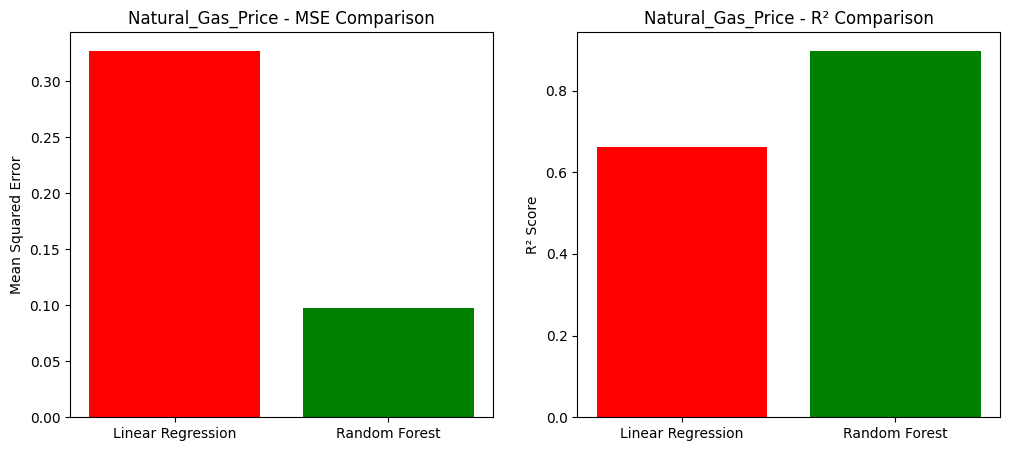


Final Results for Crude_oil_Price:
  Linear Regression: MSE = 0.1163, R² = 0.8369
  Random Forest: MSE = 0.0627, R² = 0.9116, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Crude_oil_Price:
  Linear Regression: 0.0277 seconds
  Random Forest: 1.7015 seconds


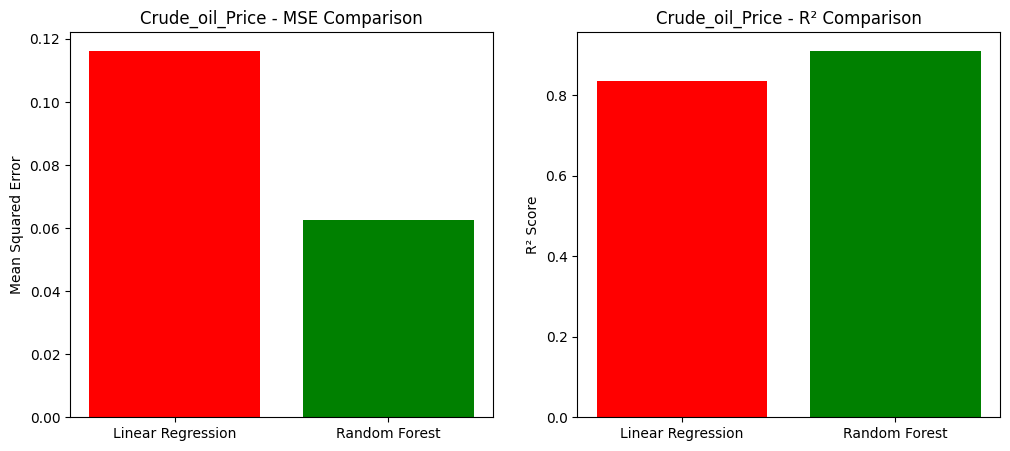


Final Results for Copper_Price:
  Linear Regression: MSE = 0.1885, R² = 0.6247
  Random Forest: MSE = 0.0516, R² = 0.8941, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training Time for Copper_Price:
  Linear Regression: 0.0284 seconds
  Random Forest: 1.7548 seconds


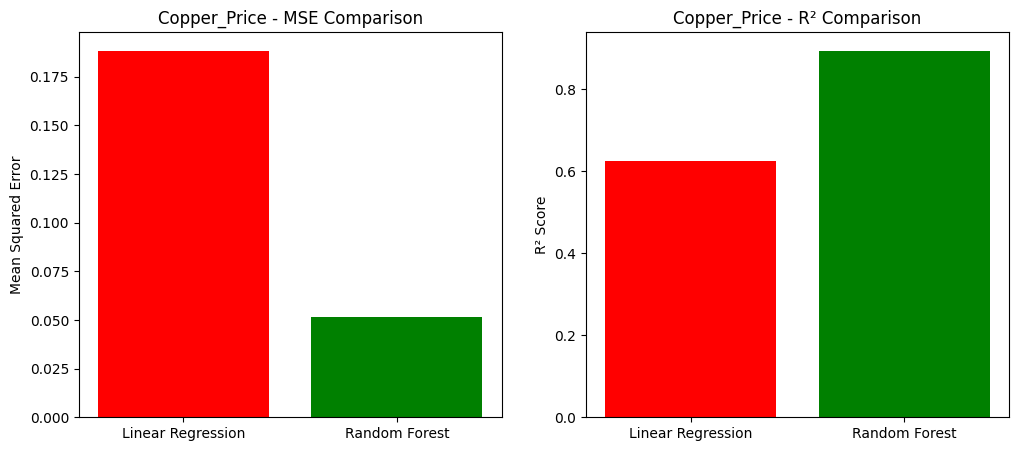


Final Results for Bitcoin_Price:
  Linear Regression: MSE = 0.2018, R² = 0.7475
  Random Forest: MSE = 0.0917, R² = 0.8828, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Bitcoin_Price:
  Linear Regression: 0.0265 seconds
  Random Forest: 1.5829 seconds


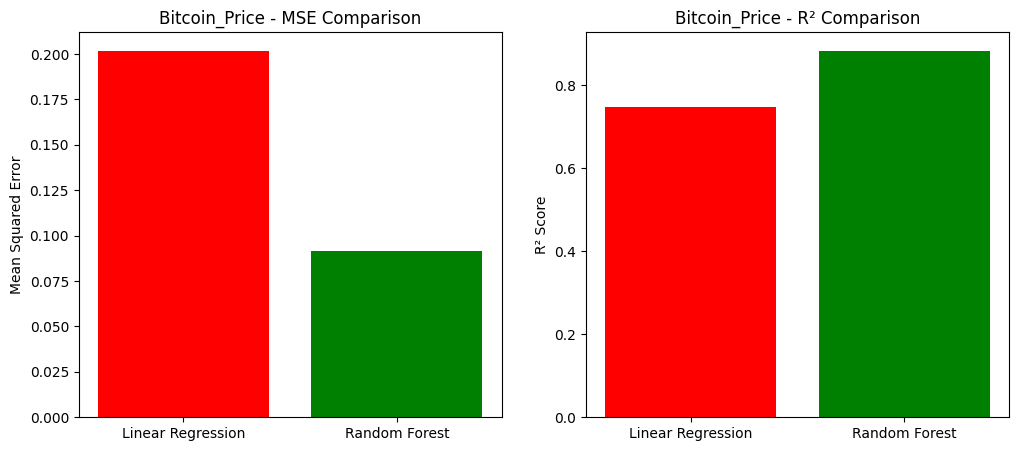


Final Results for Platinum_Price:
  Linear Regression: MSE = 0.6337, R² = 0.2140
  Random Forest: MSE = 0.1539, R² = 0.8049, Best Params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Training Time for Platinum_Price:
  Linear Regression: 0.0286 seconds
  Random Forest: 1.5573 seconds


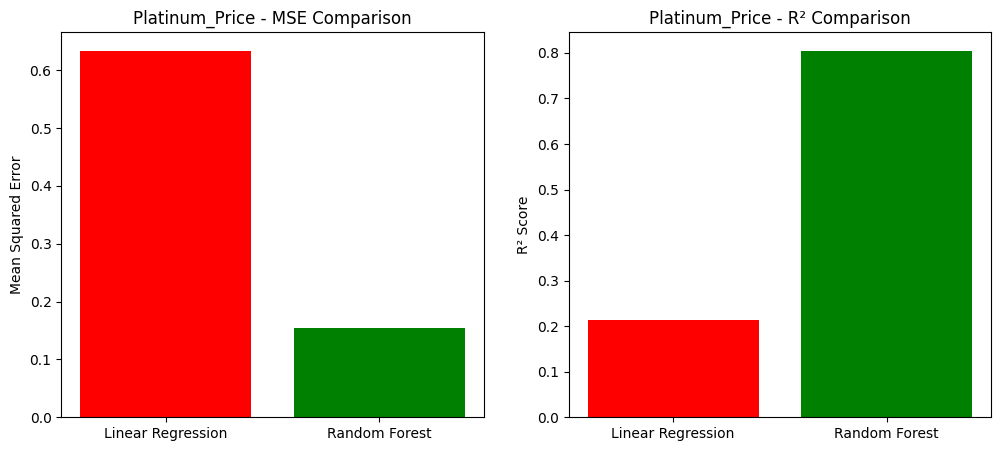


Final Results for Ethereum_Price:
  Linear Regression: MSE = 0.1509, R² = 0.8088
  Random Forest: MSE = 0.0493, R² = 0.9352, Best Params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Ethereum_Price:
  Linear Regression: 0.0262 seconds
  Random Forest: 1.4610 seconds


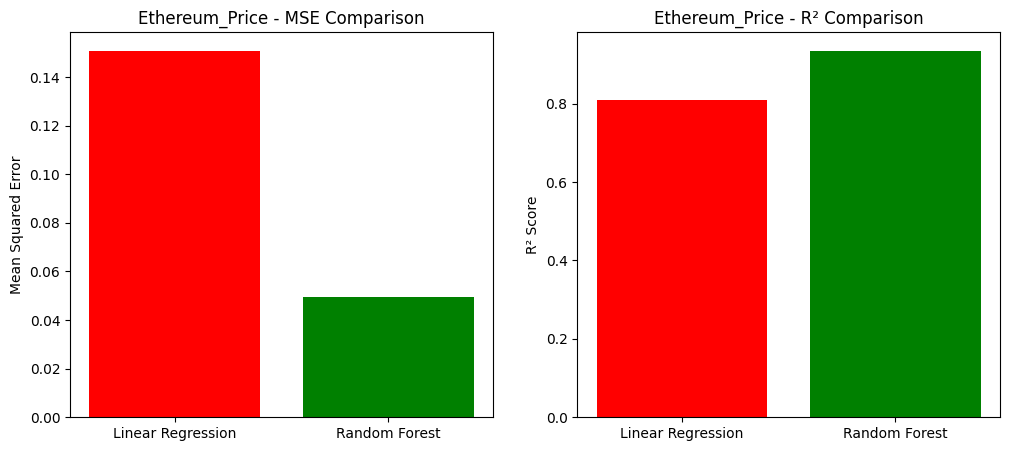


Final Results for S&P_500_Price:
  Linear Regression: MSE = 0.0399, R² = 0.9195
  Random Forest: MSE = 0.0269, R² = 0.9439, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Time for S&P_500_Price:
  Linear Regression: 0.0252 seconds
  Random Forest: 1.3543 seconds


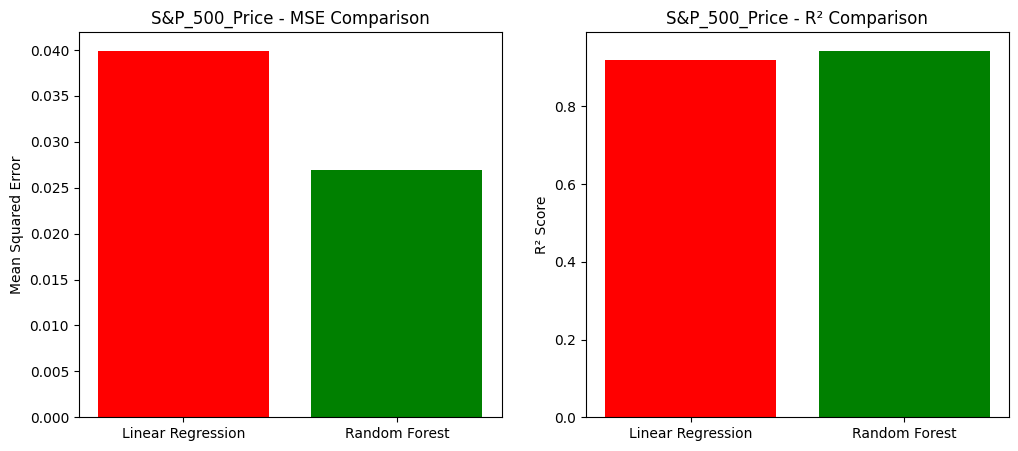


Final Results for Nasdaq_100_Price:
  Linear Regression: MSE = 0.0552, R² = 0.9010
  Random Forest: MSE = 0.0328, R² = 0.9413, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Training Time for Nasdaq_100_Price:
  Linear Regression: 0.0261 seconds
  Random Forest: 2.0455 seconds


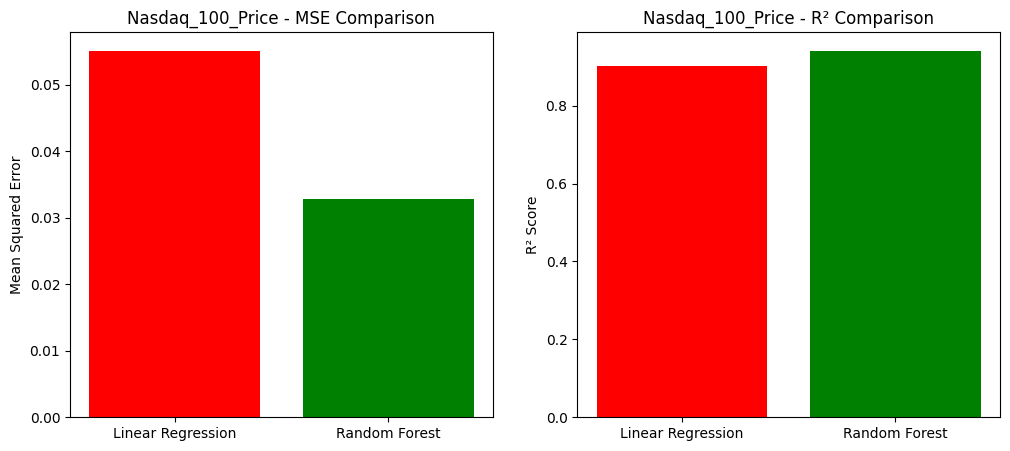


Final Results for Apple_Price:
  Linear Regression: MSE = 0.0765, R² = 0.8327
  Random Forest: MSE = 0.0363, R² = 0.9220, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Apple_Price:
  Linear Regression: 0.0262 seconds
  Random Forest: 1.5445 seconds


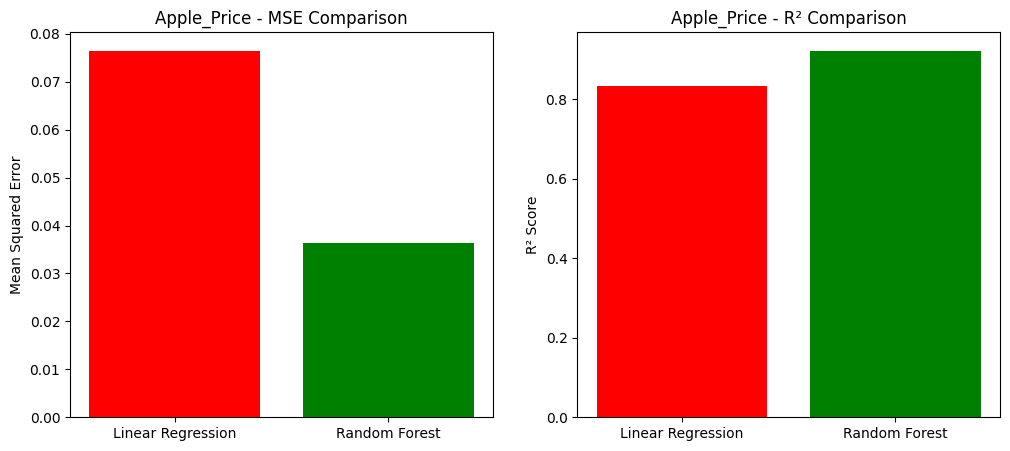


Final Results for Tesla_Price:
  Linear Regression: MSE = 0.1732, R² = 0.6619
  Random Forest: MSE = 0.0712, R² = 0.8604, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Training Time for Tesla_Price:
  Linear Regression: 0.0260 seconds
  Random Forest: 1.5098 seconds


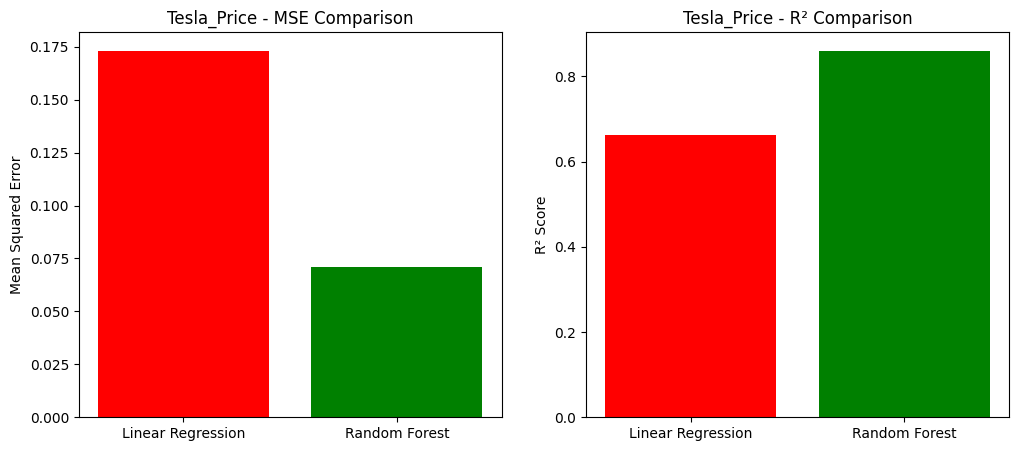


Final Results for Microsoft_Price:
  Linear Regression: MSE = 0.0862, R² = 0.8744
  Random Forest: MSE = 0.0366, R² = 0.9458, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Time for Microsoft_Price:
  Linear Regression: 0.0277 seconds
  Random Forest: 1.5441 seconds


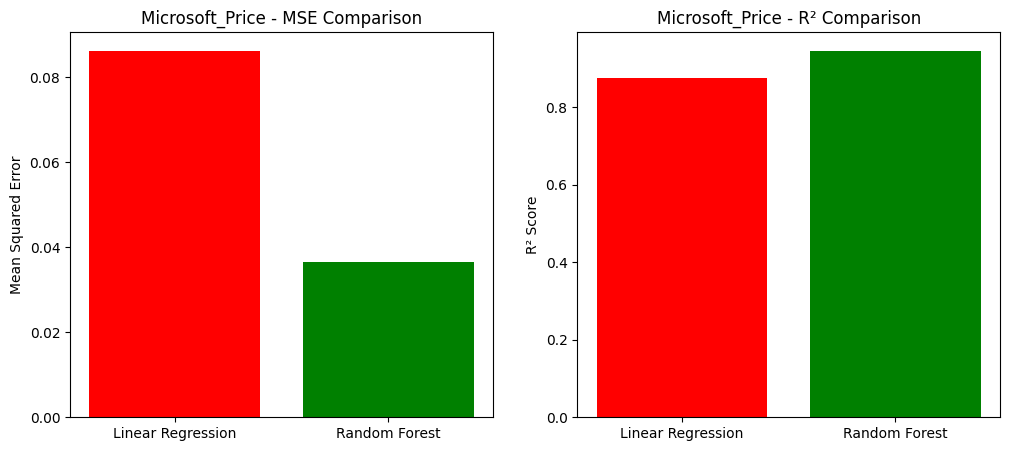


Final Results for Silver_Price:
  Linear Regression: MSE = 0.2611, R² = 0.4802
  Random Forest: MSE = 0.0949, R² = 0.8117, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Silver_Price:
  Linear Regression: 0.0256 seconds
  Random Forest: 2.1821 seconds


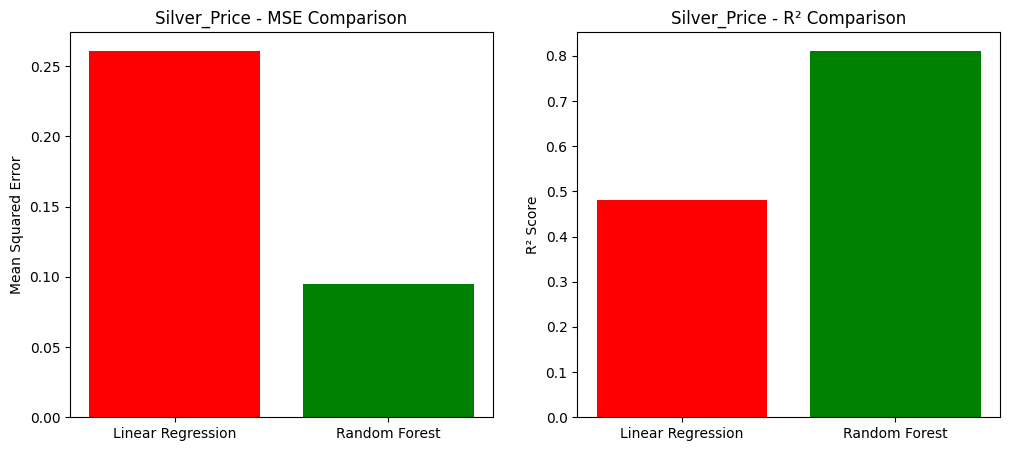


Final Results for Google_Price:
  Linear Regression: MSE = 0.0579, R² = 0.9134
  Random Forest: MSE = 0.0335, R² = 0.9496, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Google_Price:
  Linear Regression: 0.0265 seconds
  Random Forest: 1.5742 seconds


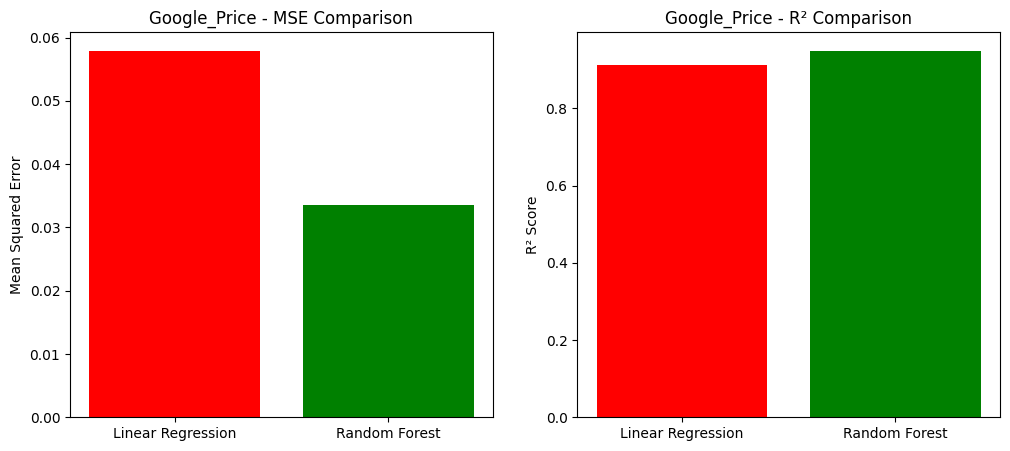


Final Results for Nvidia_Price:
  Linear Regression: MSE = 0.1208, R² = 0.8685
  Random Forest: MSE = 0.0333, R² = 0.9637, Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Nvidia_Price:
  Linear Regression: 0.0274 seconds
  Random Forest: 1.6004 seconds


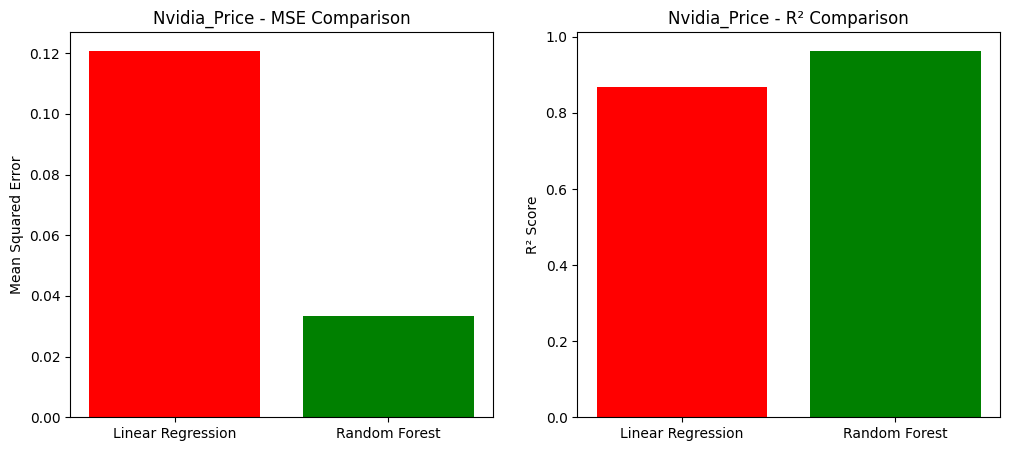


Final Results for Berkshire_Price:
  Linear Regression: MSE = 0.0610, R² = 0.9093
  Random Forest: MSE = 0.0217, R² = 0.9670, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Berkshire_Price:
  Linear Regression: 0.0242 seconds
  Random Forest: 1.5197 seconds


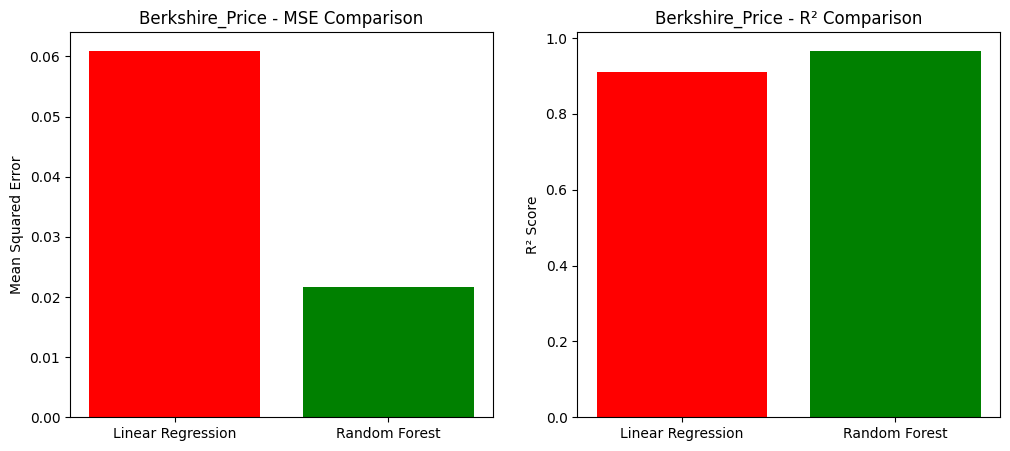


Final Results for Netflix_Price:
  Linear Regression: MSE = 0.2405, R² = 0.7828
  Random Forest: MSE = 0.0625, R² = 0.9442, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Time for Netflix_Price:
  Linear Regression: 0.0275 seconds
  Random Forest: 1.5279 seconds


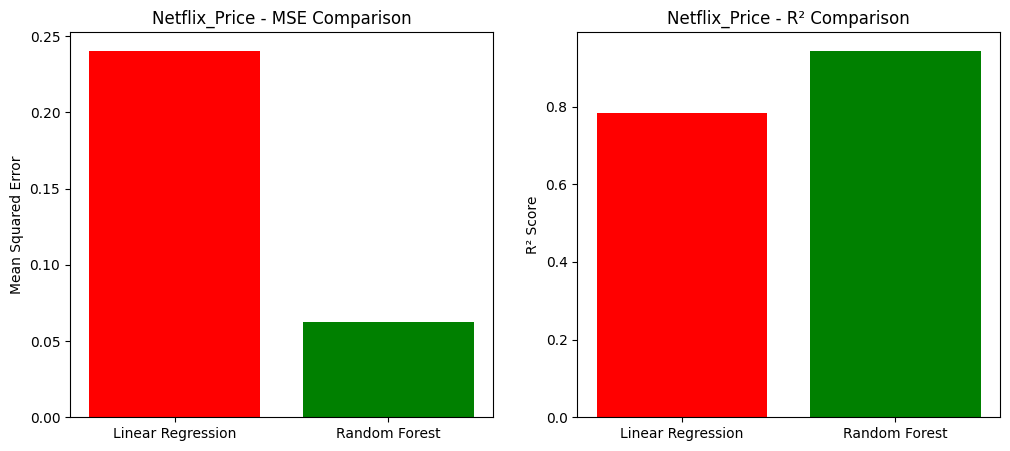


Final Results for Amazon_Price:
  Linear Regression: MSE = 0.2018, R² = 0.7798
  Random Forest: MSE = 0.0729, R² = 0.9223, Best Params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Training Time for Amazon_Price:
  Linear Regression: 0.0270 seconds
  Random Forest: 1.4194 seconds


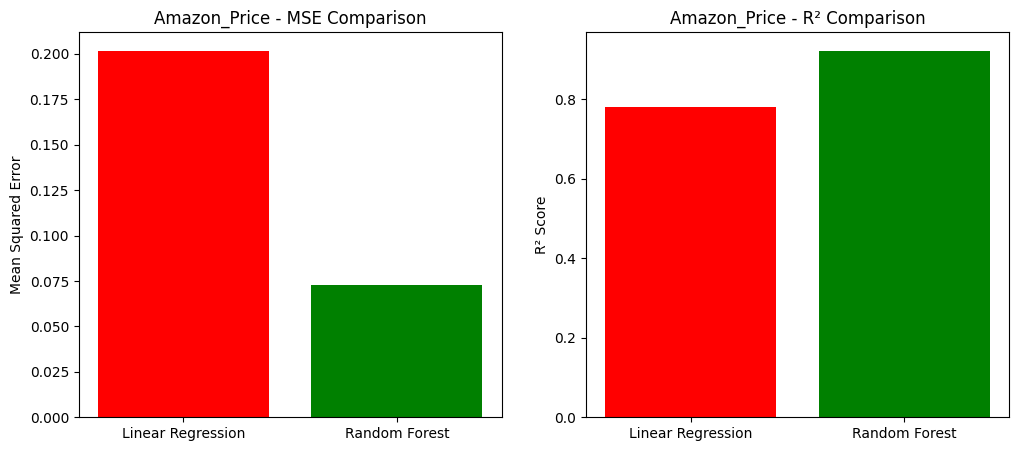


Final Results for Meta_Price:
  Linear Regression: MSE = 0.2143, R² = 0.7978
  Random Forest: MSE = 0.0721, R² = 0.9326, Best Params = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Training Time for Meta_Price:
  Linear Regression: 0.0274 seconds
  Random Forest: 1.6171 seconds


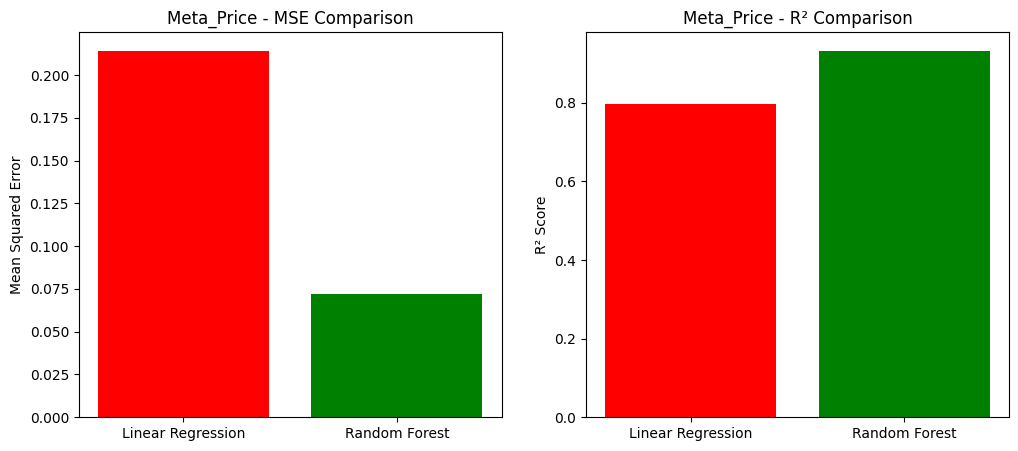


Final Results for Gold_Price:
  Linear Regression: MSE = 0.4725, R² = 0.3223
  Random Forest: MSE = 0.1180, R² = 0.8233, Best Params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Training Time for Gold_Price:
  Linear Regression: 0.0250 seconds
  Random Forest: 1.5421 seconds


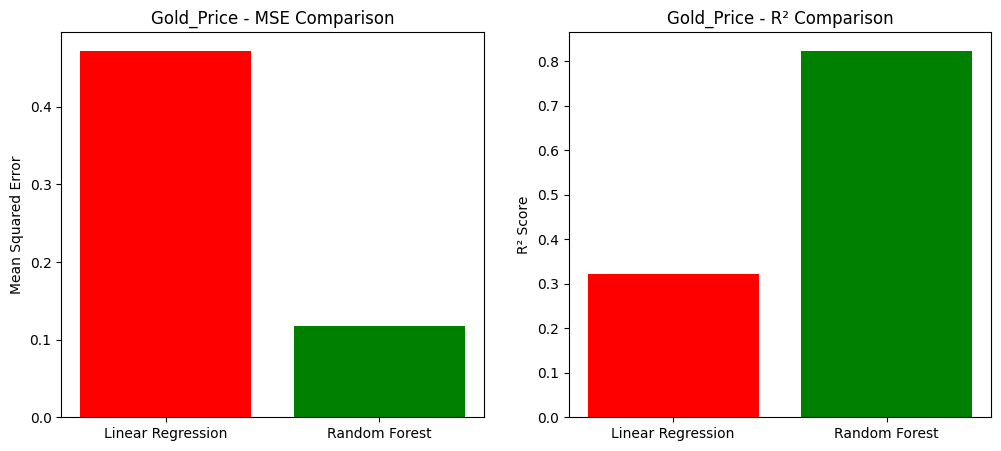


Final Comparative Analysis Table:
               Target  Linear Regression MSE  Linear Regression R²  \
0   Natural_Gas_Price               0.327299              0.661049   
1     Crude_oil_Price               0.116288              0.836859   
2        Copper_Price               0.188460              0.624678   
3       Bitcoin_Price               0.201845              0.747459   
4      Platinum_Price               0.633749              0.213998   
5      Ethereum_Price               0.150851              0.808773   
6       S&P_500_Price               0.039932              0.919457   
7    Nasdaq_100_Price               0.055163              0.900959   
8         Apple_Price               0.076488              0.832697   
9         Tesla_Price               0.173160              0.661946   
10    Microsoft_Price               0.086238              0.874418   
11       Silver_Price               0.261085              0.480161   
12       Google_Price               0.057933           

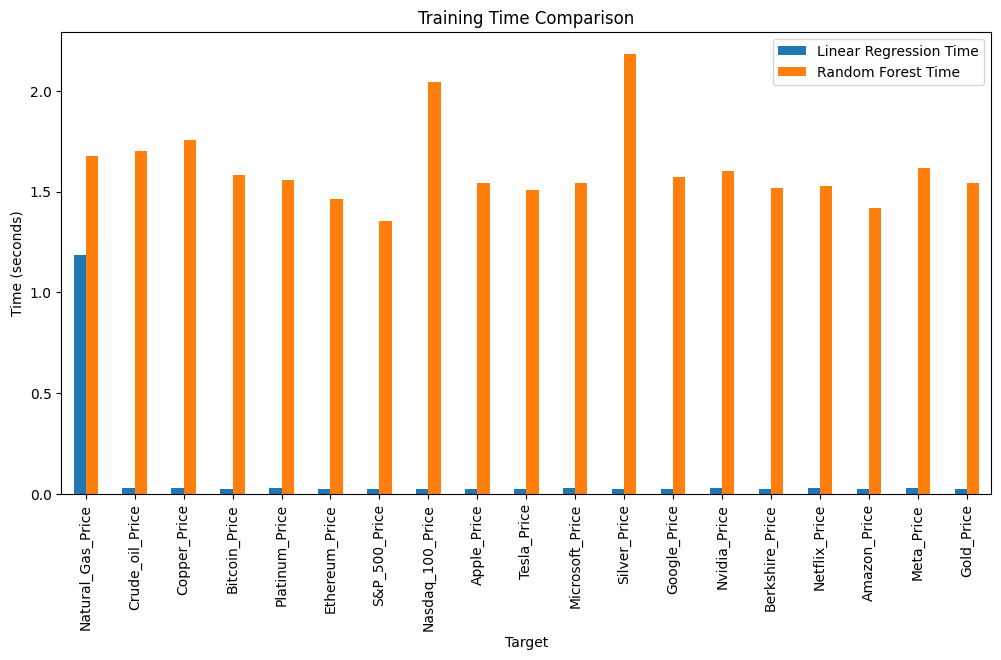


Overall Performance Across All Targets:
Linear Regression - Average MSE: 0.1936, Average R²: 0.7335
Random Forest - Average MSE: 0.0642, Average R²: 0.9081


In [ ]:
##2.1.e
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time  # For measuring computational complexity

# 1. Load Preprocessed Data
file_path = 'stock_data_with_pca.csv'  # File from previous step
stock_data = pd.read_csv(file_path)

# Ensure 'Date' column is datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 2. Define Features and Targets
features = ['PCA_1', 'PCA_2', 'PCA_3']  # PCA components
target_columns = [col for col in stock_data.columns if '_Price' in col]  # Target columns

# 3. Set Up Cross-Validation Parameters
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Train Models with Hyperparameter Tuning and Measure Computational Complexity
final_results = {}
training_times = {}

for target in target_columns:
    print(f"Processing target: {target}")
    X, y = stock_data[features], stock_data[target]

    # Linear Regression
    start_time = time.time()
    lr_model = LinearRegression()
    lr_mse = -cross_val_score(lr_model, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    lr_r2 = cross_val_score(lr_model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
    lr_time = time.time() - start_time  # Measure training time

    # Random Forest with Grid Search
    rf_params = {
        'n_estimators': [50, 100, 150],  # Number of trees
        'max_depth': [None, 10, 20],     # Tree depth
        'min_samples_split': [2, 5, 10]  # Minimum samples to split
    }
    start_time = time.time()
    rf_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf_model, rf_params, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X, y)
    best_rf = grid_search.best_estimator_
    rf_time = time.time() - start_time  # Measure training time

    rf_mse = -cross_val_score(best_rf, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    rf_r2 = cross_val_score(best_rf, X, y, cv=kfold, scoring='r2', n_jobs=-1)

    # Store Final Results and Training Times
    final_results[target] = {
        'Linear Regression': {'MSE': np.mean(lr_mse), 'R²': np.mean(lr_r2)},
        'Random Forest': {'MSE': np.mean(rf_mse), 'R²': np.mean(rf_r2), 'Best Params': grid_search.best_params_}
    }
    training_times[target] = {'Linear Regression': lr_time, 'Random Forest': rf_time}

# 5. Display Final Results, Computational Times, and Visualizations
models = ['Linear Regression', 'Random Forest']

for target, results in final_results.items():
    print(f"\nFinal Results for {target}:")
    for model, metrics in results.items():
        if model == "Random Forest":
            print(f"  {model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}, Best Params = {metrics['Best Params']}")
        else:
            print(f"  {model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")

    print(f"Training Time for {target}:")
    print(f"  Linear Regression: {training_times[target]['Linear Regression']:.4f} seconds")
    print(f"  Random Forest: {training_times[target]['Random Forest']:.4f} seconds")

    # Overlayed Bar Plot for MSE and R² Comparison
    mse_scores = [results[model]['MSE'] for model in models]
    r2_scores = [results[model]['R²'] for model in models]

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].bar(models, mse_scores, color=['red', 'green'])
    ax[0].set_title(f'{target} - MSE Comparison')
    ax[0].set_ylabel('Mean Squared Error')

    ax[1].bar(models, r2_scores, color=['red', 'green'])
    ax[1].set_title(f'{target} - R² Comparison')
    ax[1].set_ylabel('R² Score')

    plt.show()

# 6. Create a Final Comparative Table
comparison_table = []

for target in target_columns:
    comparison_table.append({
        'Target': target,
        'Linear Regression MSE': final_results[target]['Linear Regression']['MSE'],
        'Linear Regression R²': final_results[target]['Linear Regression']['R²'],
        'Linear Regression Time': training_times[target]['Linear Regression'],
        'Random Forest MSE': final_results[target]['Random Forest']['MSE'],
        'Random Forest R²': final_results[target]['Random Forest']['R²'],
        'Random Forest Time': training_times[target]['Random Forest']
    })

comparison_df = pd.DataFrame(comparison_table)
print("\nFinal Comparative Analysis Table:")
print(comparison_df)

#Training Times
comparison_df.plot(x='Target', y=['Linear Regression Time', 'Random Forest Time'], kind='bar', figsize=(12, 6))
plt.title("Training Time Comparison")
plt.ylabel("Time (seconds)")
plt.show()


# Overall Averages for Linear Regression and Random Forest
overall_lr_mse = comparison_df['Linear Regression MSE'].mean()
overall_lr_r2 = comparison_df['Linear Regression R²'].mean()
overall_rf_mse = comparison_df['Random Forest MSE'].mean()
overall_rf_r2 = comparison_df['Random Forest R²'].mean()

# Overall Results
print("\nOverall Performance Across All Targets:")
print(f"Linear Regression - Average MSE: {overall_lr_mse:.4f}, Average R²: {overall_lr_r2:.4f}")
print(f"Random Forest - Average MSE: {overall_rf_mse:.4f}, Average R²: {overall_rf_r2:.4f}")



##2.1.e
The provided code processes the stock price dataset using Linear Regression and Random Forest Regressor to compare their predictive performance. It begins by defining input features (PCA_1, PCA_2, PCA_3) and target variables (stock prices) from a PCA-transformed dataset. For each target, the code trains both models, evaluates them using 5-fold cross-validation, and averages the results for robust performance metrics such as Mean Squared Error (MSE) and R² Score. Hyperparameter tuning for Random Forest is performed using GridSearchCV, ensuring the best configuration of model parameters. The code measures the training time for both models to analyze computational complexity, a critical component of the 2.1.e requirement. Results are presented through overlayed bar plots for MSE and R² comparisons, as well as a final summary table that includes performance metrics and training times for each target.

##2.1.f

The ethical implications of applying machine learning to my financial dataset are significant and must be carefully considered throughout the entire modeling process. First, ensuring data privacy and security was essential, as financial information, even anonymized, carries risks of breaches or misuse if not handled responsibly. While training Linear Regression and Random Forest models, I encountered biases inherent in the dataset—patterns based on historical trends that may amplify market anomalies or exclude emerging markets, potentially leading to misleading predictions. This highlights the importance of bias mitigation and transparency in communicating the limitations of these models. The computationally intensive hyperparameter tuning and cross-validation for Random Forest models also raised concerns about environmental impact, pushing me to optimize resource usage where possible. Additionally, the relative "black-box" nature of Random Forest models underscored the need for explainability, which I addressed by analyzing feature importance to interpret results meaningfully. By using these models as tools for insight rather than absolute predictors, I acknowledge the risk of over-reliance on automation in financial decision-making, emphasizing the need for human oversight and accountability.

###2.1.g


Bibliographic References
Below are the references that were used during the preparation of this notebook:

Scikit-learn Documentation
Scikit-learn Developers. (2024). User Guide and API Documentation.
Retrieved from: https://scikit-learn.org/stable/

Pandas Documentation
Pandas Development Team. (2024). Pandas User Guide.
Retrieved from: https://pandas.pydata.org/docs/

Matplotlib and Seaborn Documentation
Hunter, J. D., et al. (2024). Matplotlib Documentation.
Retrieved from: https://matplotlib.org/stable/
Waskom, M. L., et al. (2024). Seaborn Visualization Library.
Retrieved from: https://seaborn.pydata.org/

Feature Engineering for Time-Series Data
Brownlee, J. (2018). How to Use Lag Features and Moving Averages for Time Series Forecasting.
Retrieved from: https://machinelearningmastery.com

Hyperparameter Tuning with GridSearchCV
Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: A Hands-On, Beginner's Guide to Scikit-Learn and TensorFlow.
Retrieved from: Packt Publishing